### Visualizing and Analysing The Data

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', None)

Read The Dataset

In [2]:
# Reading the csv and printing its shape

df = pd.read_csv('../Dataset/emp_promotion.csv')
print('shape of train data {}'.format(df.shape))

shape of train data (54808, 14)


In [3]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Univariate Analysis

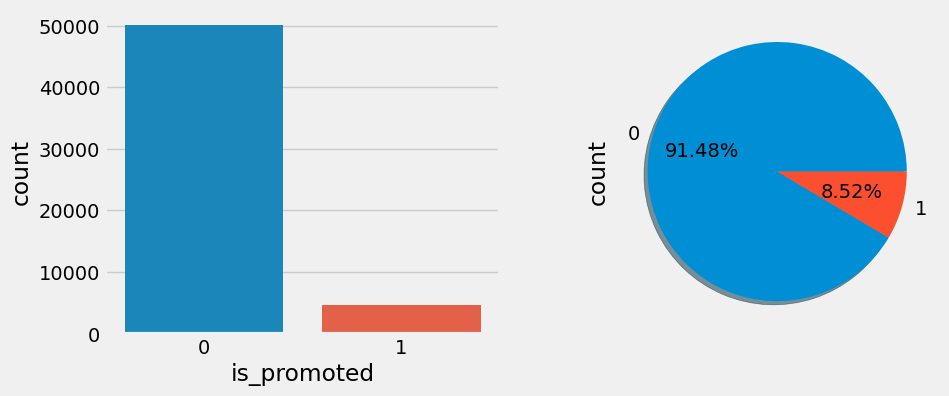

In [4]:
# Data is imbalanced

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x='is_promoted', data=df)
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie', autopct='%.2f%%',shadow=True)
plt.show()

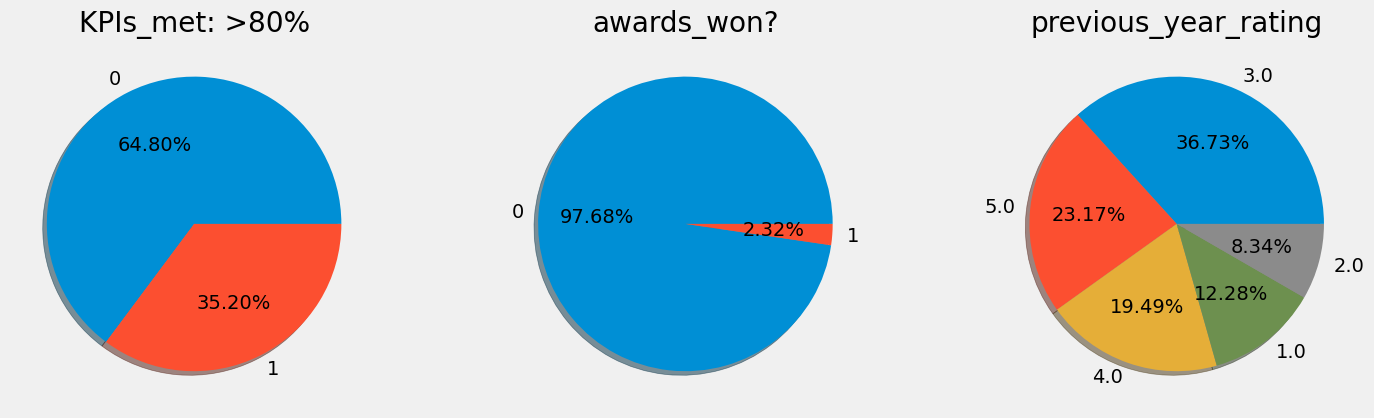

In [5]:
plt.figure(figsize=(16,10))
plt.subplot(231) 
plt.axis('off')
plt.title('KPIs_met: >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie', shadow=True, autopct = '%.2f%%')
plt.show()

<Axes: xlabel='avg_training_score'>

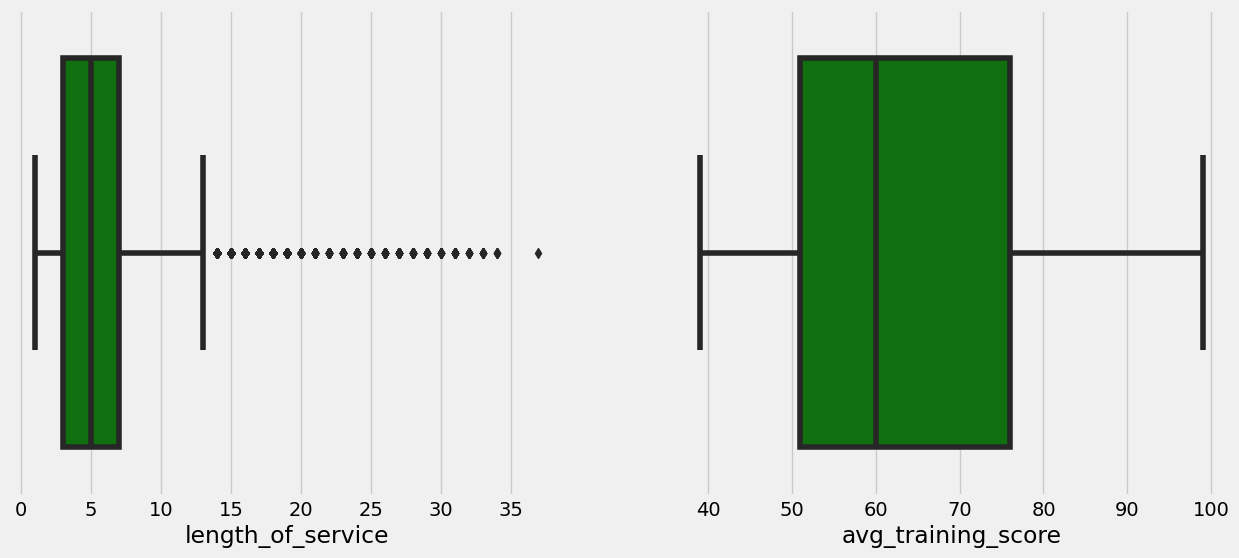

In [6]:
# Length of services column has outliers
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(x=df['length_of_service'], color='g')
plt.subplot(122)
sns.boxplot(x=df['avg_training_score'], color='g')

Multivariate Analysis

<Axes: xlabel='avg_training_score', ylabel='previous_year_rating'>

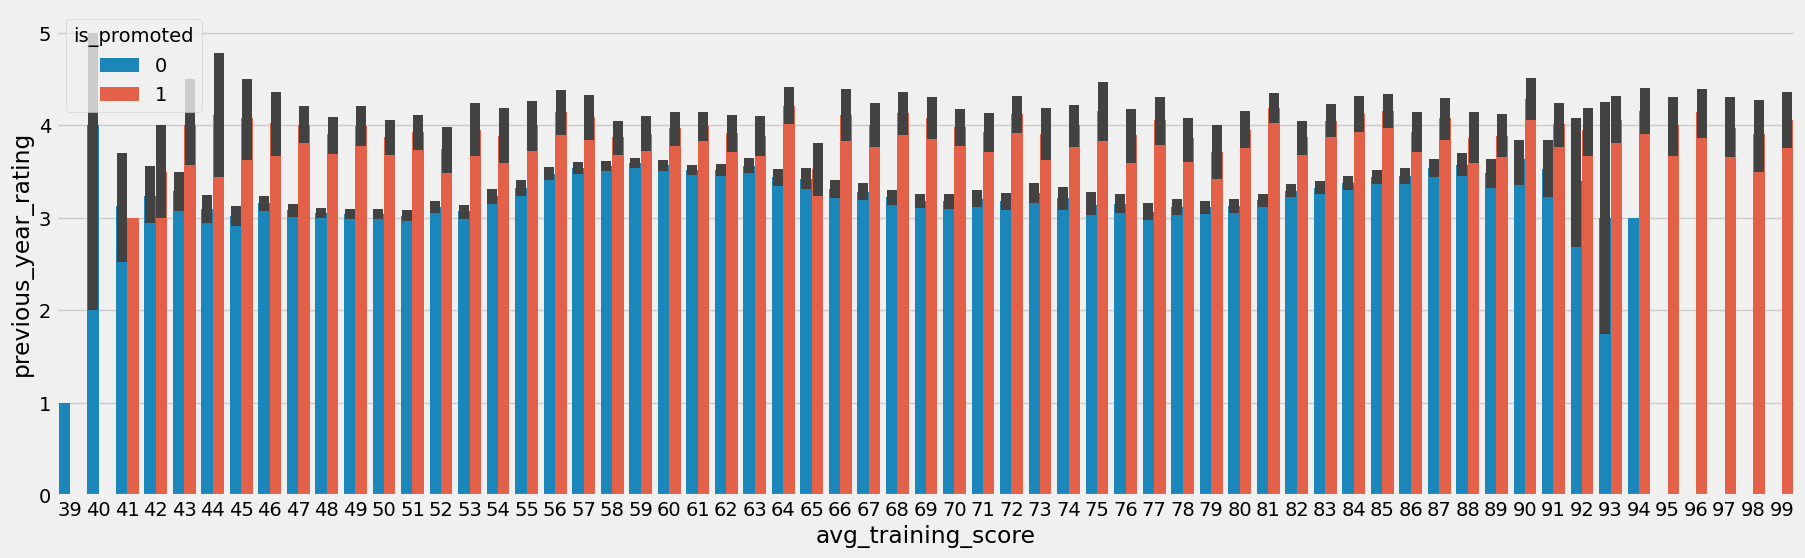

In [7]:
"""From the below bar plot, we came to know that employee with training score > 95 & previous year rating > 3 got promoted."""
plt.figure(figsize=(20,6))
sns.barplot(x='avg_training_score', y='previous_year_rating', hue='is_promoted', data=df)

Descriptive Analysis

In [8]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


### Data Pre-Processing

In [9]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
"""To predict the promotion, employee id is not required and even sex feature is also not important. For promotion, region and recruitment channel is not important. So, removing employee id, sex, recruitment_channel and region"""
df = df.drop(['employee_id', 'gender', 'region', 'recruitment_channel'], axis=1)

In [11]:
# Checking For Null Values
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
# Replacing nan with mode

print(df['education'].value_counts())
df['education']=df['education'].fillna(df['education'].mode()[0])

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


In [13]:
# Replacing nan with mode

print(df['previous_year_rating'].value_counts())
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


Remove Negative Data

In [14]:
# Finding the employee who got promoted even in poor performance. It affect model performance.
negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & 
            (df['is_promoted']==1) & (df['avg_training_score']<60)]
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [15]:
# Removing negative data

df.drop(index=[31860,51374],inplace=True)

In [16]:
# Handling outliers

q1 = np.quantile(df['length_of_service'],0.25)
q3 = np.quantile(df['length_of_service'],0.75)

IQR = q3-q1

upperBound = (1.5*IQR)+q3
lowerBound = (1.5*IQR)-q1

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('upperBound :',upperBound)
print('lowerBound :',lowerBound)
print('Skewed data :',len(df[df['length_of_service']>upperBound]))

q1 : 3.0
q3 : 7.0
IQR : 4.0
upperBound : 13.0
lowerBound : 3.0
Skewed data : 3489


In [17]:
"""Here outliers can't be removed. employee with higher length of services has higher promotion percentage.
So, capping is done on this features."""

pd.crosstab([df['length_of_service']>upperBound],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [18]:
# Capping 

df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]

Handling Categorical Values

In [19]:
# Feature mapping is done on education column
import joblib
df['education']=df['education'].replace(("Below Secondary","Bachelor's","Master's & above"),(1,2,3))

lb = LabelEncoder()
df['department']=lb.fit_transform(df['department'])

In [20]:
joblib.dump(lb, 'label_encoder_department.pkl')

['label_encoder_department.pkl']

In [21]:
df.head(20)

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,3,1,35,5.0,8.0,1,0,49,0
1,4,2,1,30,5.0,4.0,0,0,60,0
2,7,2,1,34,3.0,7.0,0,0,50,0
3,7,2,2,39,1.0,10.0,0,0,50,0
4,8,2,1,45,3.0,2.0,0,0,73,0
5,0,2,2,31,3.0,7.0,0,0,85,0
6,4,2,1,31,3.0,5.0,0,0,59,0
7,4,3,1,33,3.0,6.0,0,0,63,0
8,0,2,1,28,4.0,5.0,0,0,83,0
9,7,3,1,32,5.0,5.0,1,0,54,0


Handling Imbalanced Data

In [22]:
# Splitting data and resampling it
x = df.drop('is_promoted', axis=1)
y = df['is_promoted']
print(x.shape) 
print(y.shape)

(54806, 9)
(54806,)


In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE()
x_resample, y_resample = smote.fit_resample(x, y)

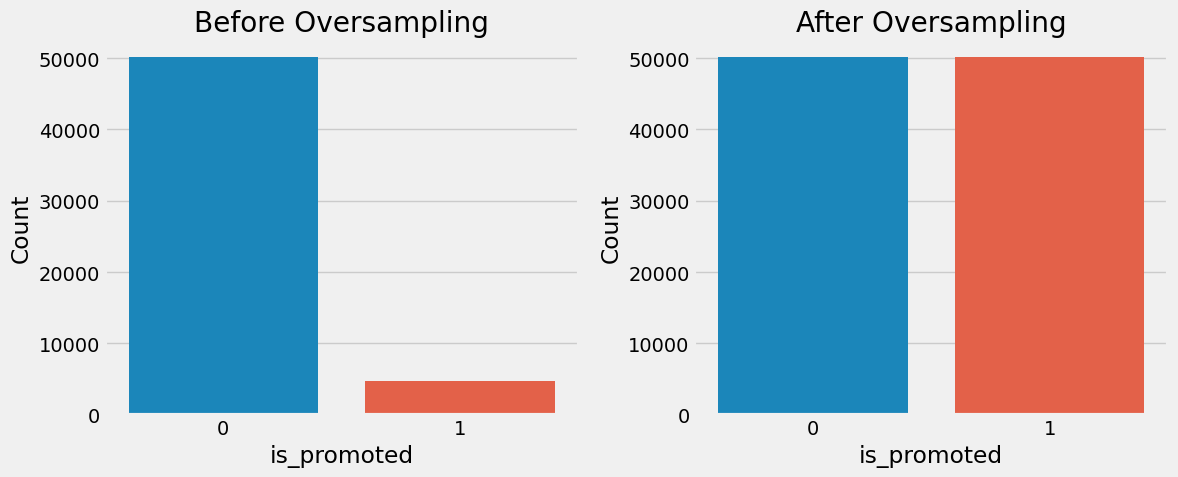

In [25]:
plt.figure(figsize=(12, 5))

# Before Oversampling
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Before Oversampling')
plt.ylabel('Count')

# After Oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resample)
plt.title('After Oversampling')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Splitting Data Into Train And Test

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)

In [27]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (70196, 9)
Shape of y_train (70196,)
Shape of x_test (30084, 9)
Shape of y_test (30084,)


Descision Tree Model

In [28]:
def decisionTree(X_train, X_test, y_train, y_test):
    # Initialize the DecisionTreeClassifier
    model = DecisionTreeClassifier(random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return model

# Call the function with training and testing data
decisionTree(x_train, x_test, y_train, y_test)

Confusion Matrix:
[[13853  1212]
 [  878 14141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15065
           1       0.92      0.94      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

Accuracy: 0.93


DecisionTreeClassifier(random_state=42)

Random Forest Model

In [29]:
def randomForest(X_train, X_test, y_train, y_test):
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return model

# Call the function with training and testing data
randomForest(x_train, x_test, y_train, y_test)

Confusion Matrix:
[[14187   878]
 [  758 14261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15065
           1       0.94      0.95      0.95     15019

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084

Accuracy: 0.95


RandomForestClassifier(random_state=42)

KNN Model

In [30]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Function to train and evaluate a KNN model
def KNN(X_train, X_test, y_train, y_test):
    # Initialize the KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return model

# Call the function with training and testing data
KNN(x_train, x_test, y_train, y_test)


Confusion Matrix:
[[12332  2733]
 [  534 14485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     15065
           1       0.84      0.96      0.90     15019

    accuracy                           0.89     30084
   macro avg       0.90      0.89      0.89     30084
weighted avg       0.90      0.89      0.89     30084

Accuracy: 0.89


KNeighborsClassifier()

XGboost Model

In [31]:
def xgboost(X_train, X_test, y_train, y_test):
    # Initialize the GradientBoostingClassifier
    model = GradientBoostingClassifier(random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return model

# Call the function with training and testing data
xgboost(x_train, x_test, y_train, y_test)


Confusion Matrix:
[[12546  2519]
 [ 1454 13565]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     15065
           1       0.84      0.90      0.87     15019

    accuracy                           0.87     30084
   macro avg       0.87      0.87      0.87     30084
weighted avg       0.87      0.87      0.87     30084

Accuracy: 0.87


GradientBoostingClassifier(random_state=42)

Compare Model

In [32]:
# Function to evaluate the model
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return cm, cr, accuracy

# Models to compare
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

# Evaluate each model
for name, model in models.items():
    cm, cr, accuracy = evaluate_model(model, x_train, x_test, y_train, y_test)
    results[name] = {"Confusion Matrix": cm, "Classification Report": cr, "Accuracy": accuracy}

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\nClassification Report:")
    print(metrics["Classification Report"])
    print(f"Accuracy: {metrics['Accuracy']:.2f}\n")
    print("-" * 50)

Model: Decision Tree
Confusion Matrix:
[[13853  1212]
 [  878 14141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     15065
           1       0.92      0.94      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

Accuracy: 0.93

--------------------------------------------------
Model: Random Forest
Confusion Matrix:
[[14187   878]
 [  758 14261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15065
           1       0.94      0.95      0.95     15019

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084

Accuracy: 0.95

--------------------------------------------------
Model: KNN
Confusion Mat

In [33]:
# Random forest is selected

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [34]:
cv = cross_val_score(rf,x_resample,y_resample,cv=5)
np.mean(cv)

0.9466493817311527

In [35]:
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

print(f"Model saved to {model_filename}")

Model saved to model.pkl


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def decisionTree_with_random_search(X_train, X_test, y_train, y_test):
    # Initialize the DecisionTreeClassifier
    model = DecisionTreeClassifier(random_state=42)
    
    # Define the hyperparameters and their possible values
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5),
        'max_features': [None, 'auto', 'sqrt', 'log2']
    }
    
    # Initialize RandomizedSearchCV with the model and the parameter distribution
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                       n_iter=100, scoring='accuracy', cv=5, n_jobs=-1, verbose=2, random_state=42)
    
    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train)
    
    # Get the best parameters and the best model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    
    # Make predictions on the test data with the best model
    y_pred = best_model.predict(X_test)
    
    # Evaluate the best model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print("Best Parameters:", best_params)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

# Example usage with training and testing data
best_decision_tree_model = decisionTree_with_random_search(x_train, x_test, y_train, y_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4}
Confusion Matrix:
[[13966  1099]
 [  983 14036]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     15065
           1       0.93      0.93      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084

Accuracy: 0.93


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def randomForest_with_random_search(X_train, X_test, y_train, y_test):
    # Initialize the RandomForestClassifier
    model = RandomForestClassifier(random_state=43)
    
    # Define the hyperparameters and their possible values
    param_dist = {
        'n_estimators': randint(100, 500),
        'max_features': ['auto', 'sqrt'],
        'max_depth': randint(10, 30),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 3),
        'bootstrap': [True]
    }
    
    # Initialize RandomizedSearchCV with the model and the parameter distribution
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                       n_iter=50, scoring='accuracy', cv=3, n_jobs=-1, verbose=2, random_state=42)
    
    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train)
    
    # Get the best parameters and the best model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    
    # Make predictions on the test data with the best model
    y_pred = best_model.predict(X_test)
    
    # Evaluate the best model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print("Best Parameters:", best_params)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

# Example usage with training and testing data
best_random_forest_model = randomForest_with_random_search(x_train, x_test, y_train, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'bootstrap': True, 'max_depth': 28, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 419}
Confusion Matrix:
[[14248   817]
 [  814 14205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15065
           1       0.95      0.95      0.95     15019

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084

Accuracy: 0.95


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import randint, uniform

def KNN_with_random_search(X_train, X_test, y_train, y_test):
    # Initialize the KNeighborsClassifier
    model = KNeighborsClassifier()
    
    # Define the hyperparameters and their possible values
    param_dist = {
        'n_neighbors': randint(1, 30),  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weight function
        'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
    }
    
    # Initialize RandomizedSearchCV with the model and the parameter distribution
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                       n_iter=50, scoring='accuracy', cv=3, n_jobs=-1, verbose=2, random_state=42)
    
    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train)
    
    # Get the best parameters and the best model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    
    # Make predictions on the test data with the best model
    y_pred = best_model.predict(X_test)
    
    # Evaluate the best model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print("Best Parameters:", best_params)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

# Example usage with training and testing data
best_knn_model = KNN_with_random_search(x_train, x_test, y_train, y_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Confusion Matrix:
[[13156  1909]
 [  731 14288]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     15065
           1       0.88      0.95      0.92     15019

    accuracy                           0.91     30084
   macro avg       0.91      0.91      0.91     30084
weighted avg       0.91      0.91      0.91     30084

Accuracy: 0.91


In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import randint, uniform

def xgboost_with_random_search(X_train, X_test, y_train, y_test):
    # Initialize the XGBClassifier
    model = XGBClassifier(random_state=42)
    
    # Define the hyperparameters and their possible values
    param_dist = {
        'n_estimators': randint(50, 500),  # Number of boosting rounds
        'learning_rate': uniform(0.01, 0.3),  # Learning rate
        'max_depth': randint(3, 15),  # Maximum depth of trees
        'min_child_weight': randint(1, 10),  # Minimum sum of instance weight needed in a child
        'subsample': uniform(0.5, 0.5),  # Fraction of samples used for fitting the trees
        'colsample_bytree': uniform(0.5, 0.5),  # Fraction of features used for fitting each tree
        'gamma': uniform(0, 5)  # Minimum loss reduction required to make a further partition
    }
    
    # Initialize RandomizedSearchCV with the model and the parameter distribution
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                       n_iter=50, scoring='accuracy', cv=3, n_jobs=-1, verbose=2, random_state=42)
    
    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train)
    
    # Get the best parameters and the best model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    
    # Make predictions on the test data with the best model
    y_pred = best_model.predict(X_test)
    
    # Evaluate the best model
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print("Best Parameters:", best_params)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print(f"Accuracy: {accuracy:.2f}")
    
    return best_model

# Example usage with training and testing data
best_xgboost_model = xgboost_with_random_search(x_train, x_test, y_train, y_test)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.625125680257932, 'gamma': 0.194173672147116, 'learning_rate': 0.10097965440196684, 'max_depth': 13, 'min_child_weight': 5, 'n_estimators': 313, 'subsample': 0.8849967765493054}
Confusion Matrix:
[[14233   832]
 [ 1067 13952]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     15065
           1       0.94      0.93      0.94     15019

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084

Accuracy: 0.94
